### 18. The consumer watchdog group in a small town is concerned about the cost of electricity for residential customers. Analyzing a random sample of 25 residential accounts, the total costs of electricity used over three months (June, July, August) are 514, 536, 345, 440, 427, 443, 386, 418, 364, 483, 506, 385, 410, 561, 275, 396, 295, 402, 350, 343, 480, 334, 324, 414, 296. Assume that the amount of used electricity follows a normal distribution with unknown mean, $\mu$ and a fixed deviation $\sigma=80$.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Here are useful functions used in this Notebook:

# Computes the mean from a distribution-array
bayes.numericalmean <- function(dist,x){return(sum(dist*x))}

# Computes the variance from a distribution-array
bayes.numericalvariance <- function(dist,x){return(sum( dist*(x-bayes.numericalmean(dist,x))^2 ))}

# Prints the distribution and it's credibility interval in a pretty way:
# Parameters
# x:    sequence array of the x axis
# y:    distribution-array
# est:  best estimator location (x-coordinate)
# cred: array of the two values of the credibility interval c(low,high)
# xlim: x limits in the printing of the plot
# col:  main colour
grafichs.printcredibilityinterval <- function(x,y,est,cred,xlim,col)
    {
        plot(x,y,pch='',xlim=xlim, main = 'Credibility interval')
    
        i <- 1
        j <- 1
        
        while(x[j] < cred[2])
            {
                if(x[i] < cred[1])
                    {
                        i <- i + 1
                    }
            
                j <- j + 1
            }
        k <- i
        yp <- c(0)
        while(k<=j)
            {
                yp <- c(yp,y[k])
                k <- k + 1
            }
        yp <- c(yp, 0)
        xp <- c(cred[1], seq(x[i], x[j], x[2]-x[1]), cred[2])
    
        polygon(x = xp, y = yp, col = adjustcolor(col,alpha.f=0.3), border = 0)
        lines(x,y,col=col,lwd=2)
        abline(v=est,lwd=2,col=col,lty=2)
        abline(v=cred[1],lwd=1,col=col,lty=2)
        abline(v=cred[2],lwd=1,col=col,lty=2)
    }

# Being the gaussian conjugate to itself, we can compute the posterior updating the parameters 
# using the theory of statistics. It returns the array c(mean,sd)
# Parameters:
# data:     empirical values for the likelihood
# priorsig: sigma of the normal prior
# priorm:   mean of the normal prior
# knownsig: known sigma
bayes.normalinference.normalprior.knownsig <- function(data, priorsig, priorm, knownsig)
    {
        y.bar <- mean(data)
        n <- length(data)
        m <- priorm
        s <- priorsig
        sigma <- knownsig
    
        mu.post <- m*((1/s^2)/((n/sigma^2) + (1/s^2))) + y.bar *((n/sigma^2))/((n/sigma^2)+ (1/s^2))
        sd.sq.post <- ((sigma^2)*(s^2))/(sigma^2 + n*s^2)
    
        return(c(mu.post, sqrt(sd.sq.post)))
    }

# A rough way to get the credibility interval
bayes.getcredibilityinterval <- function(dist,x,conf)
    {
        delta.p <- x[2] - x[1]
        indx <- match(max(dist),dist)
        area <- max(dist)*delta.p
        
        
        i <- 1
        j <- 1
    
        while(area < conf)
            {
                if (indx - j > 0 )
                    {
                        area <- area + ( dist[indx+i] + dist[indx-j] ) * delta.p
                        i <- i + 1
                        j <- j + 1
                    }
                # This may solve some problems for distribution where the max is close to 0
                else
                    {
                        area <- area + ( dist[indx+i] ) * delta.p
                        i <- i + 1
                    }
            }
    
        return( c( x[indx-j] , x[indx+i] ) ) 
    }

# This just paste some text about the hypothesis testing:
# Parameters:
# level:  level of hypothesis testing ex if 5% -> 0.05
# result: result of the hypothesis testing
bayesian.printacceptreject <- function(level,result)
    {
        if(result < level)
            {
                cat('Since', round(result,5), 'is less than', level, 'we reject the hypothesis')
            }
        else
            {
                cat('Since', round(result,5), 'is greater than', level, 'we cannot reject the hypothesis')
            }
    }

# Function to plot a function and it's area below
graphics.addplotdist <- function(dist,x,col1)
    {
        xp <- c(x[1],x,x[length(x)])
        yp <- c(0,dist,0)
    
        polygon(x = xp, y = yp, col = adjustcolor(col1,alpha.f=0.3), border = 0)
        lines(x,dist,col=col1,lwd=2)
    }

#### Use a normal prior with mean = 325 and a standard deviation of $\sigma=80$ for $\mu$, and find the posterior distribution for $\mu$

In [3]:
data <- c(514,536,345,440,427,443,386,418,364,
          483,506,385,410,561,275,306,294,402,
          350,343,480,334,324,414,296)

x <- seq(0,325*2)
priorfunc <- function(x)
    {
        return(dnorm(x,mean = 325, sd = 80))
    }

Update rule:
$$m' = \frac{\sigma^2 m + s^2 y}{\sigma^2 + s^2}$$

$$s'^2 =\frac{\sigma^2s^2}{\sigma^2+ s^2}$$

In [4]:
# Using a Normal distribution as prior it can be demonstrated with a little algebra that the posterior
# is a normal distribution as well (the gaussian is the conjiugate prior of itself) 
mu.post <- bayes.normalinference.normalprior.knownsig(data, 80, 325, 80)[1]
sd.post <- bayes.normalinference.normalprior.knownsig(data, 80, 325, 80)[2]

Posterior mean

[1] " 398.5"

Posterior sd

[1] " 15.6892908110547"

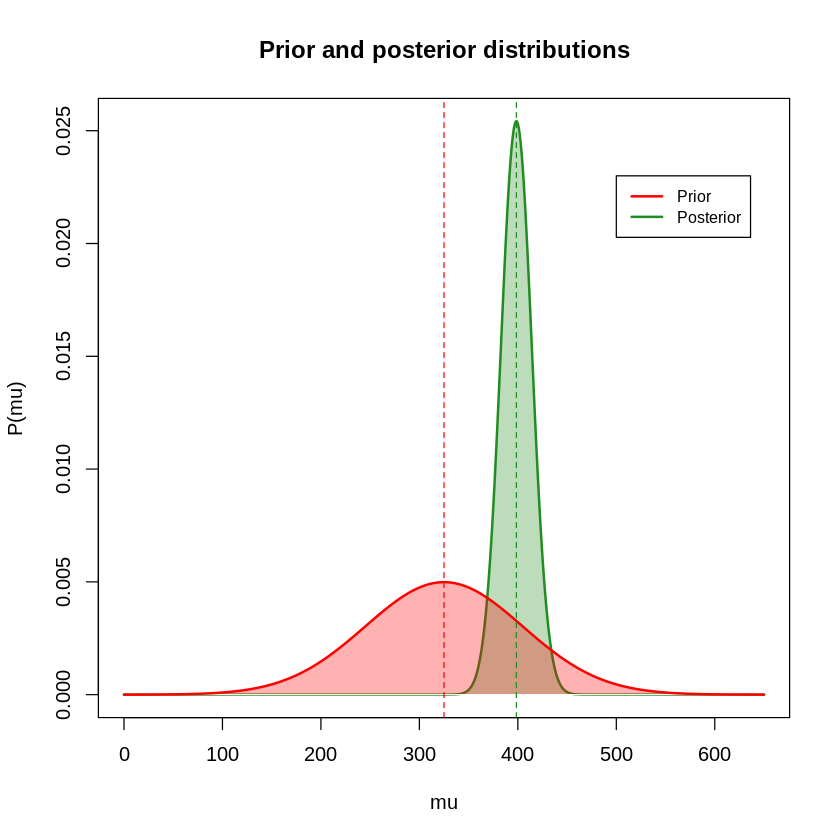

In [5]:
prior <- priorfunc(x)
posterior <- dnorm(x, mean = mu.post, sd = sd.post)

postmean <- bayes.numericalmean(posterior,x)
postvar  <- bayes.numericalvariance(posterior,x)
paste(cat('Posterior mean'),postmean)
paste(cat('Posterior sd'),sqrt(postvar))

plot(x,posterior,pch='',xlab='mu',ylab='P(mu)',main='Prior and posterior distributions')

graphics.addplotdist(posterior,x,'forestgreen')
graphics.addplotdist(prior,x,'red')
abline(v=postmean,col='forestgreen',lty=2)
abline(v=325,col='red',lty=2)
legend(500, 0.023, legend=c("Prior", "Posterior"),
       col=c("red", "forestgreen"), lty=1, cex=0.8, lwd=2)

### Find a 95% credible interval for $\mu$

In [6]:
posteriorfunc <- function(x)
    {
        return(dnorm(x, mean = mu.post, sd = sd.post))
    }

In [7]:
x = seq(0,325*2,0.001)
y = posteriorfunc(x)

In [8]:
cred <- bayes.getcredibilityinterval(y,x,0.95)

In [9]:
cred

[1] 367.749 429.251

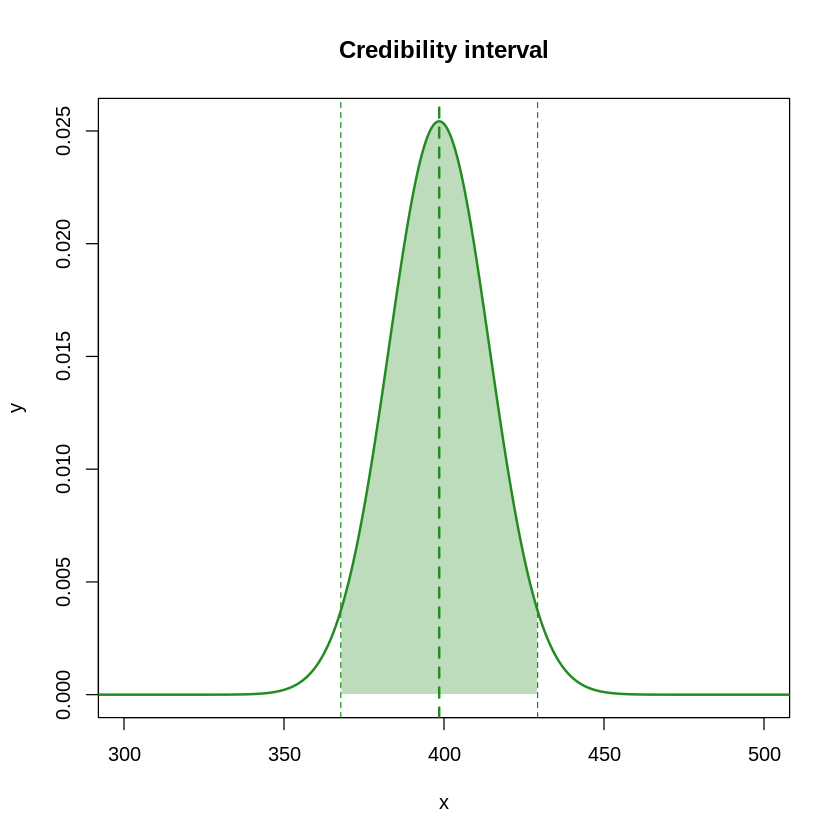

In [10]:
grafichs.printcredibilityinterval(x,y,mu.post,cred,c(300,500),'forestgreen')

### Perform a Bayesian test of hypothesis: H0: $\mu\leq 350$ versus H1: $\mu > 350$ at the 5% level

In [11]:
# Compute the hyphotesis testing 
p0 <- 350
posteriorfunc <- function(x)
    {
        return(dnorm(x, mean=mu.post, sd=sd.post))
    }

result <- integrate(posteriorfunc, lower=0, upper=p0)

result

0.0009964761 with absolute error < 1.5e-06

In [12]:
bayesian.printacceptreject(0.05,result$value)

Since 0.001 is less than 0.05 we reject the hypothesis